<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Defining-Functions" data-toc-modified-id="Defining-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Defining Functions</a></span></li><li><span><a href="#Reading-the-Data" data-toc-modified-id="Reading-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reading the Data</a></span><ul class="toc-item"><li><span><a href="#Cleaning-Date-Columns" data-toc-modified-id="Cleaning-Date-Columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cleaning Date Columns</a></span></li></ul></li><li><span><a href="#Graphical-Exploration" data-toc-modified-id="Graphical-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Graphical Exploration</a></span><ul class="toc-item"><li><span><a href="#Evolution-of-Confirmed-Cases" data-toc-modified-id="Evolution-of-Confirmed-Cases-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Evolution of Confirmed Cases</a></span></li><li><span><a href="#Confirmed,-Deaths-and-Recovered" data-toc-modified-id="Confirmed,-Deaths-and-Recovered-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Confirmed, Deaths and Recovered</a></span></li><li><span><a href="#COVID-19-Around-the-Globe" data-toc-modified-id="COVID-19-Around-the-Globe-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>COVID-19 Around the Globe</a></span></li></ul></li></ul></div>

This notebook was created to analyze data from Kaggle's dataset `Corona Virus`. The goal is to go through the data and extract relevant information about the global virus. In parallel we will apply useful Python tools to explore graphs and get insights from the data provided.

# Importing Libraries

In [1]:
# Libs to be used on this project
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
import urllib.request, json

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Defining Functions

In [2]:
# Formatting matplotlib figures
def format_spines(ax, right_border=True):
    """
    This function sets up borders from an axis and personalize colors
    
    Input:
        Axis and a flag for deciding or not to plot the right border
    Returns:
        Plot configuration
    """    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

# Reading the Data

First of all, let's read the files provided and look into each one to see its content.

In [3]:
# Whats in the zip file provided?
data_path = r'D:\Users\thiagoPanini\github_files\kaggle_challenges\kernels\08_corona_virus\data'
datasets = [d for d in os.listdir(data_path) if '.csv' in d]
datasets

['2019_nCoV_data.csv',
 'COVID19_line_list_data.csv',
 'COVID19_open_line_list.csv',
 'covid_19_data.csv',
 'time_series_covid_19_confirmed.csv',
 'time_series_covid_19_deaths.csv',
 'time_series_covid_19_recovered.csv']

In [4]:
# Reading the updated corona virus dataset
df_corona = pd.read_csv(data_path + f'\covid_19_data.csv')
df_corona.columns = [c.lower().replace(' ', '_').replace('/', '_') for c in df_corona.columns]
df_corona.head()

,sno,observationdate,province_state,country_region,last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


According to the dataset documentation, we have below the explanation for each columns of this data:

- **sno:** serial number;
- **observationdate:** observation date in the format MM/DD/YYYY;
- **province_state:** province or state of the observation (could be empty when missing);
- **country_region:** country of observation;
- **last_update:** time in UTC at wich the row is updated for the given province or country;
- **confirmed**: cumulative number of confirmed cases till that date;
- **deaths:** cumulative number of deaths till that date;
- **recovered:** cumulative number of recovered cases till that date

In [5]:
# Dimensions of the data
df_corona.shape

(5890, 8)

## Cleaning Date Columns

Also according to the documentation, it's necessary to pay attention with the date columns (`observationdate` and `last_update`). It's possible to face some unformatted entries. Let's take a look at the data types.

In [6]:
# Data types
df_corona.dtypes

sno                  int64
observationdate     object
province_state      object
country_region      object
last_update         object
confirmed          float64
deaths             float64
recovered          float64
dtype: object

In [9]:
# Cleaning last_update column
df_corona['last_update_cleaned'] = pd.to_datetime(df_corona['last_update']).dt.date
df_corona['obs_date_cleaned'] = pd.to_datetime(df_corona['observationdate']).dt.date
df_corona.drop(['last_update', 'observationdate'], axis=1, inplace=True)
df_corona.columns = ['sno', 'province_state', 'country_region', 'confirmed', 
                     'deaths', 'recovered', 'observation_date', 'last_update']
df_corona.head()

,sno,province_state,country_region,confirmed,deaths,recovered,observation_date,last_update
0,1,Anhui,Mainland China,1.0,0.0,0.0,2020-01-22,2020-01-22
1,2,Beijing,Mainland China,14.0,0.0,0.0,2020-01-22,2020-01-22
2,3,Chongqing,Mainland China,6.0,0.0,0.0,2020-01-22,2020-01-22
3,4,Fujian,Mainland China,1.0,0.0,0.0,2020-01-22,2020-01-22
4,5,Gansu,Mainland China,0.0,0.0,0.0,2020-01-22,2020-01-22


In [10]:
# Observation and update dates
print(f'Range of observation date: from {df_corona["observation_date"].min()} to {df_corona["observation_date"].max()}\n')
print(f'Range of update date: from {df_corona["last_update"].min()} to {df_corona["last_update"].max()}')

Range of observation date: from 2020-01-22 to 2020-03-15

Range of update date: from 2020-01-22 to 2020-03-15


# Graphical Exploration

## Evolution of Confirmed Cases

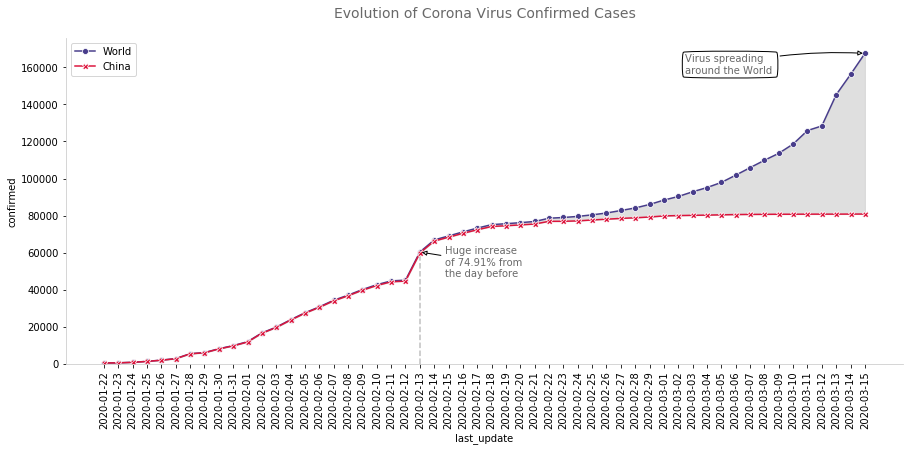

In [14]:
# Virus evolution on Mainland China
main_china = df_corona.query('country_region == "Mainland China"')

# Grouping data
cols_group = ['last_update', 'confirmed', 'deaths', 'recovered']
corona_sum = df_corona.groupby(by=['last_update'], as_index=False).sum().loc[:, cols_group]
china_sum = main_china.groupby(by=['last_update', 'country_region'], 
                               as_index=False).sum().loc[:, cols_group + ['country_region']]

# Showing confirmed cases of corona virus on Mainland China
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='last_update', y='confirmed', data=corona_sum, ax=ax, color='darkslateblue', label='World', marker='o')
sns.lineplot(x='last_update', y='confirmed', data=china_sum, ax=ax, color='crimson', label='China', marker='X')

# Making some annotations
x_highlight = corona_sum['last_update'][22]
y_highlight = corona_sum['confirmed'][22]
highlight_perc_increase = 100 * (corona_sum['confirmed'][21] / corona_sum['confirmed'][22])
ax.annotate(f'Huge increase\nof {highlight_perc_increase:.2f}% from \nthe day before', 
            (mdates.date2num(x_highlight), y_highlight), 
            xytext=(25, -25),textcoords='offset points', arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey')
plt.vlines(x_highlight, 0, y_highlight, linestyle="dashed", color='silver')

# Showing the most recent information
"""xs = corona_sum['last_update'][-1:]
ys = corona_sum['confirmed'][-1:]
for x, y in zip(xs, ys):
    label = f"{int(y)}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='dimgrey')"""
    
# Making another annotations
ax.fill_between(corona_sum['last_update'], corona_sum['confirmed'], china_sum['confirmed'], color='silver', alpha=.5)
offset_annotation = (china_sum['confirmed'][-1:].values[0] - corona_sum['confirmed'][-1:].values[0])/220
ax.annotate(f'Virus spreading\naround the World ', 
            (mdates.date2num(corona_sum['last_update'][-1:]), corona_sum['confirmed'][-1:]), 
            xytext=(-180, -20), textcoords='offset points', 
            bbox=dict(boxstyle="round4", fc="w"), color='dimgrey',
            arrowprops=dict(arrowstyle='-|>', connectionstyle="arc3, rad=-0.07", fc="w"))

# Finishing plot
ax.set_title('Evolution of Corona Virus Confirmed Cases', size=14, color='dimgrey', pad=20)
ax.set_ylim(ymin=0)
format_spines(ax, right_border=False)
plt.xticks(rotation=90)
plt.xticks(corona_sum['last_update'])
plt.show()

## Confirmed, Deaths and Recovered

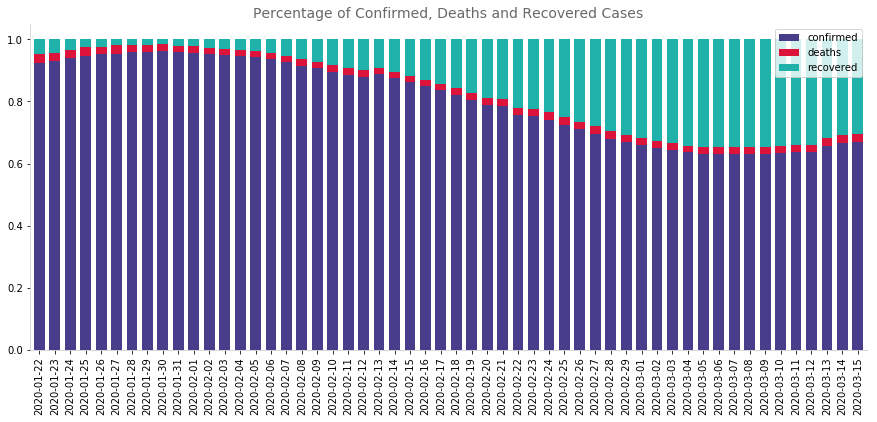

In [15]:
# How we are doing against the Virus? Is there any evolution of recovering cases?
fig, ax = plt.subplots(figsize=(15, 6))
colors = ['darkslateblue', 'crimson', 'lightseagreen']
corona_sum.drop('last_update', axis=1).div(corona_sum.sum(1).astype(float), 
                                           axis=0).plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.7)
format_spines(ax, right_border=False)
plt.xticks(np.arange(0, len(corona_sum)), corona_sum['last_update'])
ax.set_title('Percentage of Confirmed, Deaths and Recovered Cases', size=14, color='dimgrey')
plt.show()

## COVID-19 Around the Globe

In [16]:
# Reading information about region and countries from a public url
with urllib.request.urlopen("https://restcountries.eu/rest/v2/all") as url:
    data = json.loads(url.read().decode())

# The result is a dictionary with usefull keys
# Creating a new dictionary joining country and region information
country_names = [data[x]['name'] for x in range(len(data))]
country_regions = [data[x]['region'] for x in range(len(data))]

country_dict = {}
for name, region in zip(country_names, country_regions):
    country_dict[name] = region

# Transforming the dict information into a DataFrame objetc
df_country_info = pd.DataFrame(list(country_dict.items()))
df_country_info.columns = ['country', 'region']

# Making some changes on the dataset
country_changes = {
    'United States of America': 'US',
    'Macao': 'Macau',
    'Korea (Republic of)': 'South Korea',
    'Viet Nam': 'Vietnam',
    'Russian Federation': 'Russia',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran (Islamic Republic of)': 'Iran',
    'Macedonia (the former Yugoslav Republic of)': 'North Macedonia',
    'Saint Barthélemy': 'Saint Barthelemy',
    'Palestine, State of': 'Palestine',
    "Côte d'Ivoire": 'Ivory Coast',
    'North Ireland': 'Ireland'
}

# Adding new rows to avoid missing data on merging
new_rows = {
    'Others': 'Unkown',
    'Vatican City': 'Europe',
    'North Ireland': 'Europe'
}
new_rows = {
    'Others': 'Unkown',
    'Vatican City': 'Europe',
    'North Ireland': 'Europe'
}
rows_df = pd.DataFrame(list(new_rows.items()))
rows_df.columns = ['country', 'region']

# Changing some names and adding some rows
df_country_info = df_country_info.replace({'country': country_changes})
df_country_info = pd.concat([df_country_info, rows_df], ignore_index=True)

# Result
df_country_info.head()

,country,region
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania


In [140]:
# Preparing corona dataset to join with country_region dataset
df_corona['country'] = df_corona['country_region'].apply(lambda x: 'China' if x == 'Mainland China' else x)
df_corona['country'] = df_corona['country'].apply(lambda x: 'Azerbaijan' if x == ' Azerbaijan' else x)

# Merging datasets
df_region_corona = df_corona.merge(df_country_info, how='left', on='country')
df_region_corona.drop('country_region', axis=1, inplace=True)
df_region_corona.head()

,sno,province_state,confirmed,deaths,recovered,observation_date,last_update,country,region
0,1,Anhui,1.0,0.0,0.0,2020-01-22,2020-01-22,China,Asia
1,2,Beijing,14.0,0.0,0.0,2020-01-22,2020-01-22,China,Asia
2,3,Chongqing,6.0,0.0,0.0,2020-01-22,2020-01-22,China,Asia
3,4,Fujian,1.0,0.0,0.0,2020-01-22,2020-01-22,China,Asia
4,5,Gansu,0.0,0.0,0.0,2020-01-22,2020-01-22,China,Asia
